# The midterm report and 5-minute presentation should include the following.

- Preliminary visualizations of data.
- Detailed description of data processing done so far.
- Detailed description of data modeling methods used so far.
- Preliminary results. (e.g. we fit a linear model to the data and we achieve promising results, or we did some clustering and we notice a clear pattern in the data)

We expect to see preliminary code in your project repo at this point.

Your report should be submitted as README.md in your project GitHub repo.

The 5-minute presentation should be a recording uploaded to YouTube. Please add the video link to the beginning of your report.

# Visualizations of Data

In [34]:
import pandas as pd

# Load the TSV Data File
# df = pd.read_csv('./data/aml_ohsu_2022_clinical_data.tsv', sep='\t') # load the data (tsv file so need to specify sep)
# df = pd.read_csv('./data/breast_cancer.csv') # load the data 

#trying the new data down here! 
df = pd.read_csv('./data/aml_ohsu_2022_clinical_data.tsv', sep='\t')


## Data Analysis

In [35]:
# 1. Check basic info of the data
print("Data Shape:", df.shape) # check the shape of the data
df.info() # check the basic info of the data

print()
# 2. Check the first few rows of the data
print("First 5 rows:")
df.head() # check the first few rows of the data


Data Shape: (942, 68)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942 entries, 0 to 941
Data columns (total 68 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Study ID                                          942 non-null    object 
 1   Patient ID                                        942 non-null    object 
 2   Sample ID                                         942 non-null    object 
 3   Age at Diagnosis                                  916 non-null    float64
 4   Age At Specimen Acquisition                       926 non-null    float64
 5   FLT3-ITD Allelic Ratio                            864 non-null    float64
 6   ASXL1                                             100 non-null    object 
 7   Cancer Type                                       942 non-null    object 
 8   Cancer Type Detailed                              942 non-null    object 
 9  

,Study ID,Patient ID,Sample ID,Age at Diagnosis,Age At Specimen Acquisition,FLT3-ITD Allelic Ratio,ASXL1,Cancer Type,Cancer Type Detailed,Cause Of Death,...,Specific Diagnosis At Inclusion,Specimen Groups,Specimen Type,Surface Antigens Immunohistochemical Stains,"Time Of Sample Collection, Relative To Inclusion",TMB (nonsynonymous),TP53 Pathway,Treatment Type Induction,Used In Manuscript,Variant Summary
0,aml_ohsu_2022,aml_ohsu_2022_2000,aml_ohsu_2022_2000_BA2123,65.0,65.0,0.0,NaN,Acute Myeloid Leukemia,AML with mutated NPM1,Dead-Treatment,...,AML with mutated NPM1,Initial Acute Leukemia Diagnosis,Bone Marrow Aspirate,"CD2(-), CD7(-), CD11b(-), CD13(+), CD14(-), CD...",0,0.900000,NaN,NaN,Yes,DNMT3A (W297*; MAF 44%)|FLT3-D835 (D835Y; MAF ...
1,aml_ohsu_2022,aml_ohsu_2022_2001,aml_ohsu_2022_2001_BA2702,68.0,68.0,0.0,NaN,Acute Myeloid Leukemia,AML with myelodysplasia-related changes,Dead-Disease,...,AML with myelodysplasia-related changes,Post-Chemotherapy|Residual Disease,Bone Marrow Aspirate,NaN,34,1.033333,NaN,NaN,Yes,NaN
2,aml_ohsu_2022,aml_ohsu_2022_2003,aml_ohsu_2022_2003_BA2499,71.0,71.0,0.0,NaN,Acute Myeloid Leukemia,AML with myelodysplasia-related changes,Dead-Disease,...,AML with myelodysplasia-related changes,Post-Chemotherapy|Initial Acute Leukemia Diagn...,Peripheral Blood,NaN,0,0.966667,NaN,NaN,Yes,NaN
3,aml_ohsu_2022,aml_ohsu_2022_2004,aml_ohsu_2022_2004_BA2846,75.0,75.0,0.0,NaN,Acute Myeloid Leukemia,Therapy-related myeloid neoplasms,Dead-Disease,...,Therapy-related myeloid neoplasms,Initial Acute Leukemia Diagnosis|Post-Chemothe...,Bone Marrow Aspirate,"CD33, dim CD38, variable CD56, CD58, dim CD64,...",0,0.500000,NaN,NaN,Yes,IDH2 (p.R140Q; MAF 47%)|NPM1 (p.W288fs*12 (4 n...
4,aml_ohsu_2022,aml_ohsu_2022_2005,aml_ohsu_2022_2005_BA2802,52.0,53.0,0.0,NaN,Acute Leukemias of Ambiguous Lineage,"Mixed phenotype acute leukaemia, T/myeloid, NOS",Dead-Disease,...,"Mixed phenotype acute leukaemia, T/myeloid, NOS",Post-Transplant|Post-Chemotherapy|Residual Dis...,Peripheral Blood,"partial CD7, CD13, CD33, CD34, partial CD56, C...",234,0.066667,TP53 (p.V216M; 66.9%),Standard Chemotherapy,No,NaN


In [36]:
# dropping unnecessary columns

#Cancer Type Detailed is what we are predicting
df.drop('Study ID', axis=1, inplace=True)
df.drop('Cause Of Death', axis=1, inplace=True)
df.drop('Center ID', axis=1, inplace=True)
df.drop('Cohort', axis=1, inplace=True)
df.drop('Cumulative Chemo', axis=1, inplace=True)
df.drop('Unique Regiments', axis=1, inplace=True)
df.drop('No. Of Cumulative Regiments', axis=1, inplace=True)
df.drop('Unique Treatment Stages', axis=1, inplace=True)
df.drop('No. Of Unique Treatment Stages', axis=1, inplace=True)
df.drop('Unique Treatment Types', axis=1, inplace=True)
df.drop('No. Of Cumulative Treatments', axis=1, inplace=True)
df.drop('Current Regimen', axis=1, inplace=True)
df.drop('Current Stage', axis=1, inplace=True)
df.drop('Disease Stage At Specimen Collection', axis=1, inplace=True)
df.drop('Diagnosis At Inclusion', axis=1, inplace=True) #chemotherapy diagnosis
df.drop('Most Recent Treatment Duration', axis=1, inplace=True)
df.drop('Most Recent Treatment Type', axis=1, inplace=True)
df.drop('Overall Survival Status', axis=1, inplace=True)
df.drop('Response Duration To Induction', axis=1, inplace=True)
df.drop('Response To Induction', axis=1, inplace=True)
df.drop('Time Of Sample Collection, Relative To Inclusion', axis=1, inplace=True)
df.drop('Treatment Type Induction', axis=1, inplace=True)
df.drop('Used In Manuscript', axis=1, inplace=True)

# Check the statistic of the data
df.info()

df.describe() # only numeric columns
df.describe(include='all') # include all columns 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942 entries, 0 to 941
Data columns (total 45 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Patient ID                                   942 non-null    object 
 1   Sample ID                                    942 non-null    object 
 2   Age at Diagnosis                             916 non-null    float64
 3   Age At Specimen Acquisition                  926 non-null    float64
 4   FLT3-ITD Allelic Ratio                       864 non-null    float64
 5   ASXL1                                        100 non-null    object 
 6   Cancer Type                                  942 non-null    object 
 7   Cancer Type Detailed                         942 non-null    object 
 8   CEBPA bi-allelic                             46 non-null     object 
 9   ELN2017                                      942 non-null    object 
 10  Et

,Patient ID,Sample ID,Age at Diagnosis,Age At Specimen Acquisition,FLT3-ITD Allelic Ratio,ASXL1,Cancer Type,Cancer Type Detailed,CEBPA bi-allelic,ELN2017,...,Sex,Somatic Status,"Diagnosis MDS, MPN",Specific Diagnosis At Inclusion,Specimen Groups,Specimen Type,Surface Antigens Immunohistochemical Stains,TMB (nonsynonymous),TP53 Pathway,Variant Summary
count,942,942,916.000000,926.000000,864.000000,100,942,942,46,942,...,941,942,942,942,934,942,694,903.000000,87,623
unique,805,942,NaN,NaN,NaN,98,6,37,2,9,...,2,2,2,39,33,3,669,NaN,86,550
top,aml_ohsu_2022_2476,aml_ohsu_2022_2000_BA2123,NaN,NaN,NaN,ASXL1 (p.G646Wfs*12; 36.6%),Acute Myeloid Leukemia,AML with mutated NPM1,bi,NonInitial,...,Male,MATCHED,False,AML with mutated NPM1,Initial Acute Leukemia Diagnosis,Bone Marrow Aspirate,ABNORMAL CD34+ BLAST POPULATION EXPRESSING ABE...,NaN,TP53,FLT3-ITD
freq,5,1,NaN,NaN,NaN,2,905,233,25,333,...,528,500,914,232,518,527,2,NaN,2,21
mean,NaN,NaN,57.213974,57.481641,0.456668,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.428276,NaN,NaN
std,NaN,NaN,17.254826,17.254257,2.167286,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.441425,NaN,NaN
min,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,47.000000,47.000000,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.133333,NaN,NaN
50%,NaN,NaN,61.000000,62.000000,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.266667,NaN,NaN
75%,NaN,NaN,70.000000,71.000000,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.633333,NaN,NaN


## Missing Values

In [37]:
# 4. Check the missing values
missing_values = pd.DataFrame({
    'Num of Missing Values' : df.isnull().sum(), # check the missing values
    'Percentage of Missing Values' : (df.isnull().sum()/len(df) * 100).round(2) # check the percentage of missing values
})
display(missing_values)

# Filter to show columns with missing value percentage greater than a certain threshold (e.g., 20%)
high_missing_values = missing_values[missing_values['Percentage of Missing Values'] > 20]
display(high_missing_values)

print("Note: 'TP53 Pathway' Column has over 90% missing data")

# 5. Check the unique values
df.duplicated().sum() # check the number of duplicated rows
df.duplicated().sum()/len(df) * 100 # check the percentage of duplicated rows

# 6. Check the unique values in each column
df.columns # check the columns of the data

,Num of Missing Values,Percentage of Missing Values
Patient ID,0,0.00
Sample ID,0,0.00
Age at Diagnosis,26,2.76
Age At Specimen Acquisition,16,1.70
FLT3-ITD Allelic Ratio,78,8.28
ASXL1,842,89.38
Cancer Type,0,0.00
Cancer Type Detailed,0,0.00
CEBPA bi-allelic,896,95.12
ELN2017,0,0.00


,Num of Missing Values,Percentage of Missing Values
ASXL1,842,89.38
CEBPA bi-allelic,896,95.12
Ethnicity Category,409,43.42
FAB BLAST morphology,483,51.27
Other Cytogenetics,236,25.05
Type Non-Myeloid,767,81.42
Race Category,283,30.04
RUNX1,821,87.15
Surface Antigens Immunohistochemical Stains,248,26.33
TP53 Pathway,855,90.76


Note: 'TP53 Pathway' Column has over 90% missing data


Index(['Patient ID', 'Sample ID', 'Age at Diagnosis',
       'Age At Specimen Acquisition', 'FLT3-ITD Allelic Ratio', 'ASXL1',
       'Cancer Type', 'Cancer Type Detailed', 'CEBPA bi-allelic', 'ELN2017',
       'Ethnicity Category', 'FAB BLAST morphology', 'FLT3-ITD', 'De Novo',
       'Relapsed', 'Transformed', 'Karyotype', 'Mutation Count',
       'Diagnosis non AML, MDS, MPN', 'NPM1', 'Oncotree Code',
       'Overall Survival (Months)', 'Other Cytogenetics', 'Prior Non-Myeloid',
       'Prior Malignancy Radiation', 'Type Non-Myeloid', 'Prior MDS',
       'Prior MDS > Two Months', 'Prior MDS/MPN', 'Prior MDS/MPN >Two Months',
       'Prior MPN', 'Prior MPN > Two Months', 'Race Category', 'RUNX1',
       'Number of Samples Per Patient', 'Sex', 'Somatic Status',
       'Diagnosis MDS, MPN', 'Specific Diagnosis At Inclusion',
       'Specimen Groups', 'Specimen Type',
       'Surface Antigens Immunohistochemical Stains', 'TMB (nonsynonymous)',
       'TP53 Pathway', 'Variant Summary'],


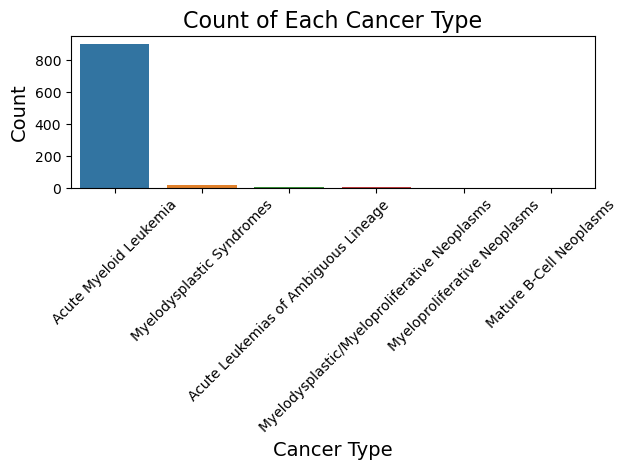

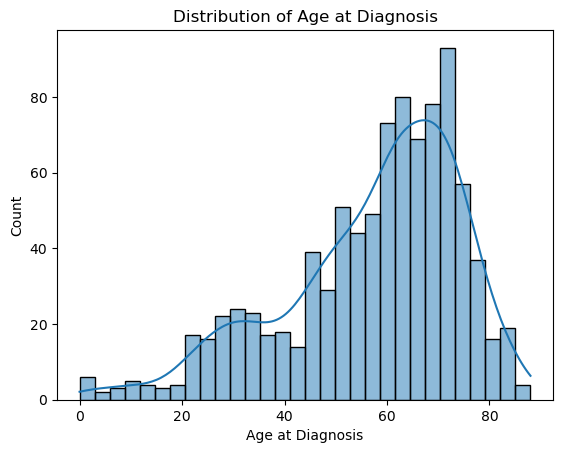

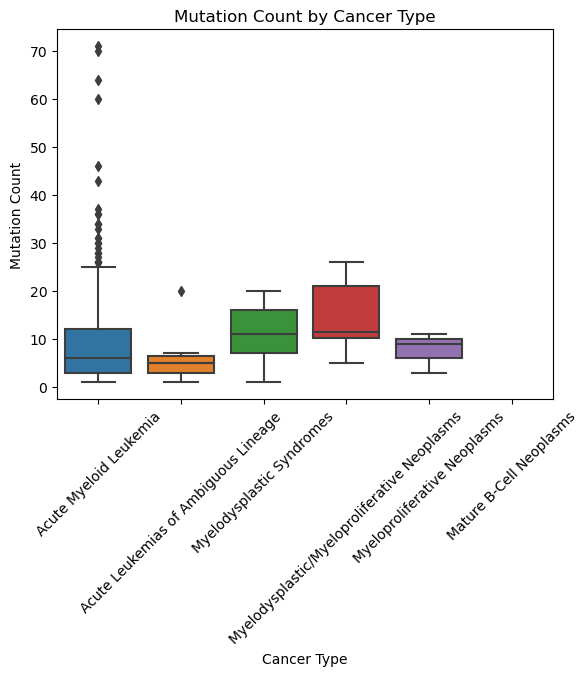

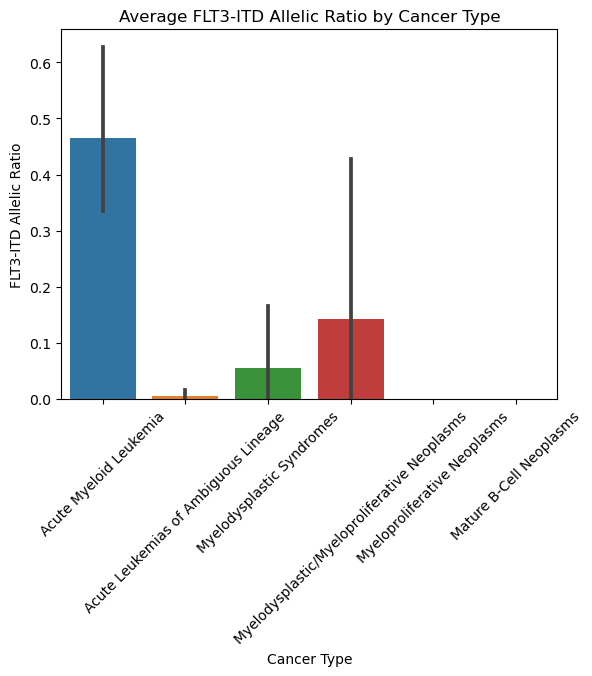

In [38]:
# aml ohsu clinical data

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

count_plot = sns.countplot(data=df, x='Cancer Type', order=df['Cancer Type'].value_counts().index)
plt.title('Count of Each Cancer Type', fontsize=16)
plt.xlabel('Cancer Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)  # Rotate x labels if needed
plt.tight_layout()
plt.show()

sns.histplot(data=df, x='Age at Diagnosis', kde=True, bins=30)
plt.title('Distribution of Age at Diagnosis')
plt.show()

sns.boxplot(data=df, x='Cancer Type', y='Mutation Count')
plt.title('Mutation Count by Cancer Type')
plt.xticks(rotation=45)
plt.show()

sns.barplot(data=df, x='Cancer Type', y='FLT3-ITD Allelic Ratio', estimator=np.mean)
plt.title('Average FLT3-ITD Allelic Ratio by Cancer Type')
plt.xticks(rotation=45)
plt.show()


# 3. Feature Engineering

- Create new features based on domain knowledge, such as ratios or interactions between existing features.
- Example: Compute ratio of 'area_mean' to 'radius_mean' for additional insight.

In [39]:
# feature engineering for aml ohsu data
print(df.columns)
# count total number of mutations ->
mutation_columns = ['ASXL1', 'CEBPA bi-allelic', 'NPM1', 'RUNX1', 'TP53 Pathway']
mutation_columns = [col for col in mutation_columns if col in df.columns]
df['Total_Mutation_Count'] = df[mutation_columns].notnull().sum(axis=1)

# see if any mutations at all
df['Any_Mutation'] = (df['Total_Mutation_Count'] > 0).astype(int)

# cytogenetics and karyotype
antigen_columns = ['Other Cytogenetics', 'Karyotype']
antigen_columns = [col for col in antigen_columns if col in df.columns]
df['Cytogenetic_Abnormalities_Count'] = df[antigen_columns].nunique(axis=1)


# prior conditions andhow that affects
prior_conditions = [
    'Prior MDS', 'Prior MDS > Two Months', 'Prior MDS/MPN', 'Prior MDS/MPN >Two Months', 
    'Prior MPN', 'Prior MPN > Two Months'
]
prior_conditions = [col for col in prior_conditions if col in df.columns]
df['Prior_Myeloid_Conditions_Count'] = df[prior_conditions].apply(lambda row: (row == 'Yes').sum(), axis=1)


# dif of between acquisition and diagnosis
df['Age At Specimen Acquisition'].fillna(0, inplace=True)
df['Age at Diagnosis'].fillna(0, inplace=True)
df['Age_Gap_Diagnosis_to_Specimen'] = df['Age At Specimen Acquisition'] - df['Age at Diagnosis']


# total number of antigens
df['Antigen_Presence_Count'] = df['Surface Antigens Immunohistochemical Stains'].apply(lambda x: len(str(x).split(',')) if pd.notnull(x) else 0)

df.info()

Index(['Patient ID', 'Sample ID', 'Age at Diagnosis',
       'Age At Specimen Acquisition', 'FLT3-ITD Allelic Ratio', 'ASXL1',
       'Cancer Type', 'Cancer Type Detailed', 'CEBPA bi-allelic', 'ELN2017',
       'Ethnicity Category', 'FAB BLAST morphology', 'FLT3-ITD', 'De Novo',
       'Relapsed', 'Transformed', 'Karyotype', 'Mutation Count',
       'Diagnosis non AML, MDS, MPN', 'NPM1', 'Oncotree Code',
       'Overall Survival (Months)', 'Other Cytogenetics', 'Prior Non-Myeloid',
       'Prior Malignancy Radiation', 'Type Non-Myeloid', 'Prior MDS',
       'Prior MDS > Two Months', 'Prior MDS/MPN', 'Prior MDS/MPN >Two Months',
       'Prior MPN', 'Prior MPN > Two Months', 'Race Category', 'RUNX1',
       'Number of Samples Per Patient', 'Sex', 'Somatic Status',
       'Diagnosis MDS, MPN', 'Specific Diagnosis At Inclusion',
       'Specimen Groups', 'Specimen Type',
       'Surface Antigens Immunohistochemical Stains', 'TMB (nonsynonymous)',
       'TP53 Pathway', 'Variant Summary'],




# 4. Model Training
   - Implement a simple model such as Logistic Regression for binary classification (e.g., 'diagnosis').
    - Split the dataset into training and test sets using train_test_split from sklearn.
    - Fit the model and evaluate initial accuracy.

# 5. Advanced Modeling
    - Experiment with other machine learning models like Random Forests, SVM, or XGBoost.
    - Use cross-validation to tune hyperparameters for optimal performance.

# 6. Evaluation Metrics
    - Evaluate models using accuracy, precision, recall, F1-score, and ROC-AUC.
    - Use classification_report and confusion_matrix from sklearn for detailed evaluation.

In [52]:
# STEP 4 MODEL TRAINING
from sklearn.model_selection import train_test_split

train = df

X_train = train[train['Cancer Type'].notnull()]

X_train, X_test, Y_train, Y_test = train_test_split(
    X_train.drop(columns=['Cancer Type']),
    X_train['Cancer Type'],
    test_size=1/4.0,
    random_state=0
)


print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print("split data...")

(706, 50)
(236, 50)
(706,)
(236,)
split data...


In [51]:
#XGBoost Model training 

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# features = ['Helpfulness', 'AppearsIn', 'ButAppearance', 'isEmpty']

# X_train_select = X_train[features]
# X_test_select = X_test[features]

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels to integers
Y_train_encoded = label_encoder.fit_transform(Y_train)

# Learn the model
model = XGBClassifier(tree_method = "hist", device = "cuda", enable_categorical=True).fit(X_train, Y_train_encoded)

# Predict the score using the model
Y_test_predictions = model.predict(X_test)

# Evaluate your model on the testing set
print("Accuracy on testing set = ", accuracy_score(Y_test, Y_test_predictions))

# Plot a confusion matrix
cm = confusion_matrix(Y_test, Y_test_predictions, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:Patient ID: object, Sample ID: object, ASXL1: category, Cancer Type Detailed: category, CEBPA bi-allelic: object, ELN2017: object, Ethnicity Category: object, FAB BLAST morphology: object, FLT3-ITD: object, De Novo: object, Relapsed: object, Transformed: object, Karyotype: object, NPM1: category, Oncotree Code: object, Other Cytogenetics: object, Prior Non-Myeloid: object, Prior Malignancy Radiation: object, Type Non-Myeloid: object, Prior MDS: object, Prior MDS > Two Months: object, Prior MDS/MPN: object, Prior MDS/MPN >Two Months: object, Prior MPN: object, Prior MPN > Two Months: object, Race Category: object, RUNX1: object, Sex: object, Somatic Status: object, Specific Diagnosis At Inclusion: object, Specimen Groups: object, Specimen Type: object, Surface Antigens Immunohistochemical Stains: object, TP53 Pathway: object, Variant Summary: object

In [49]:
# trying to do svc
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# make and fit model
model_svc = SVC(kernel='linear') # linear, poly, rbf possible options too
model_svc.fit(X_train, Y_train)

# predict
Y_test_predictions = model_svc.predict(X_test)
print(Y_test_predictions.shape)

# see accuracy??
print("Accuracy on testing set = ", accuracy_score(Y_test, Y_test_predictions))

# make confusion matrix??
# Plot a confusion matrix
cm = confusion_matrix(Y_test, Y_test_predictions, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

ValueError: could not convert string to float: 'aml_ohsu_2022_2309'